In [9]:

import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *


In [11]:
ims = search_images_ddg('hulk', max_images=1)
ims[0]

'https://media.comicbook.com/2019/02/31-hulk-1157310.jpeg'

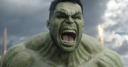

In [12]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [13]:
characters = ['Hulk', 'Captain America', 'Iron Man', 'Natasha Romanoff', 'Thor', 'Hawkeye']
path = Path('characters')

In [14]:
if not path.exists():
    path.mkdir()
    for o in characters:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} marvel')
        download_images(dest, urls=results)

In [15]:
fns = get_image_files(path)
fns

(#1138) [Path('characters/Captain America/0244732d-f5e9-4de9-a264-648d057c6ba7.jpg'),Path('characters/Captain America/02f4fecf-c99e-4878-a7f2-0d3efde1d003.jpg'),Path('characters/Captain America/061b00f6-2b72-489d-afba-fe05a214811c.jpg'),Path('characters/Captain America/072eed00-9ac8-4605-988e-ef87edeadeb5.jpg'),Path('characters/Captain America/0738e5a5-5c19-46ab-9d58-6238121a5ae0.jpg'),Path('characters/Captain America/0751070f-5452-4837-b0e4-24ba05c5323e.jpg'),Path('characters/Captain America/07db7534-110d-49fb-834b-4caea7745eef.jpg'),Path('characters/Captain America/08065cb8-50ea-4df3-8b74-2bccda17c373.jpg'),Path('characters/Captain America/08212801-75d0-4c13-ad21-cee8cfcc0361.jpg'),Path('characters/Captain America/099530a6-053b-48b8-96af-f55bac73495a.jpg')...]

In [16]:
failed = verify_images(fns)

In [17]:
failed.map(Path.unlink)


(#37) [None,None,None,None,None,None,None,None,None,None...]

In [19]:
chars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
??get_image_files

Signature: get_image_files(path, recurse=True, folders=None)
Source:   
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)
File:      f:\petro\anaconda3\envs\fastai\lib\site-packages\fastai\data\transforms.py
Type:      function

In [20]:
dls = chars.dataloaders(path)

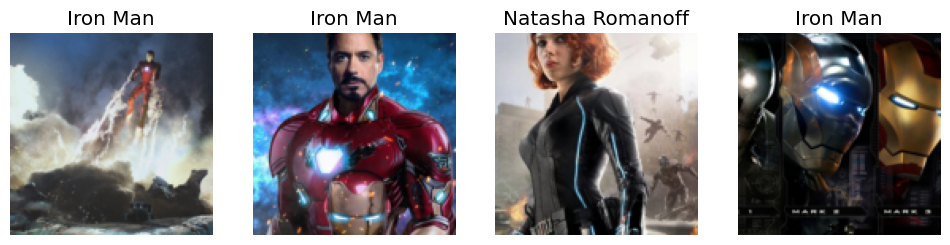

In [21]:
dls.valid.show_batch(max_n=4, nrows=1)

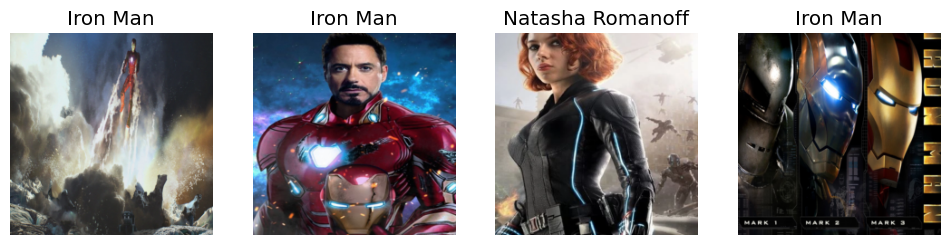

In [22]:
chars= chars.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = chars.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.163631,0.796107,0.265766,00:46


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.847931,0.480237,0.162162,00:46
1,0.627229,0.410083,0.126126,00:46
2,0.489161,0.333713,0.108108,00:45
3,0.404471,0.322950,0.108108,00:46


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

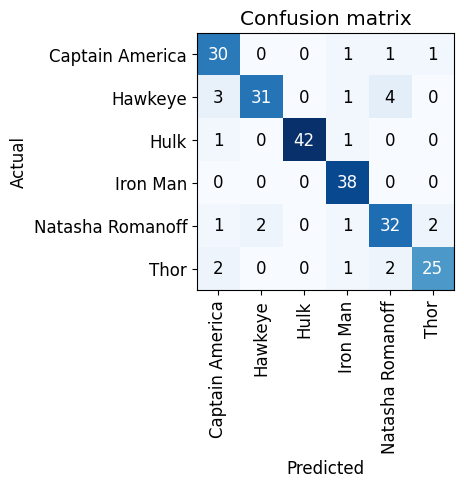

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


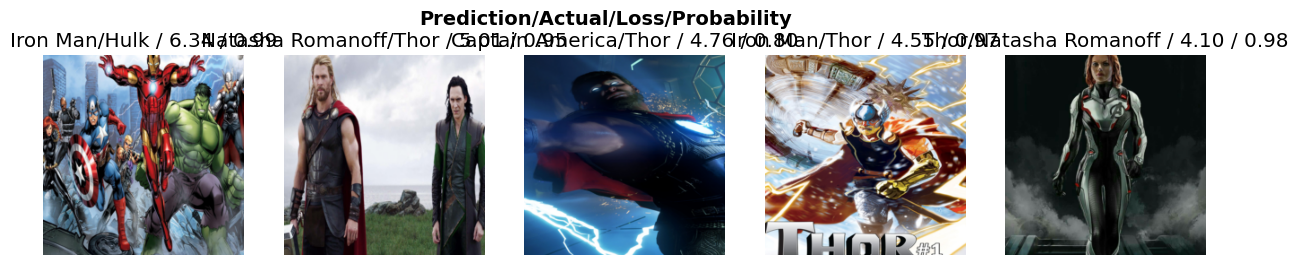

In [16]:
interp.plot_top_losses(5, nrows=1)

In [17]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:

# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [19]:
learn.export()